# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data

import pandas as pd
import os

data_dir = os.getcwd()
data = pd.read_csv(os.path.join(data_dir, "assignment2_data.csv"), encoding='utf8')

data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data = data.iloc[:,1:]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.shape

(6019, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


<h1>전처리</h1>

In [7]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
# 'New_Price' 열 제거 (결측치가 너무 많음)
data = data.drop('New_Price', axis=1)

# 결측치가 있는 행 제거
data = data.dropna()

data = data.reset_index(drop=True)

data.shape

(5975, 12)

In [9]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [10]:
# 각 칼럼에 대한 값 확인

for column in data.columns:
    print(f'---- {column} ----')
    print(data[column].value_counts())
    print('\n')

---- Name ----
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1855, dtype: int64


---- Location ----
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64


---- Year ----
2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: in

### 단위 제거하고 수치형 변수로 변경


- Power 열

In [11]:
# 'Power' 열 : 'null bhp'라는 값 존재 -> NaN으로 처리
data['Power'].replace('null bhp', np.nan, inplace=True)

# Nan값 포함하는 행 제거
data.dropna(subset=['Power'], inplace=True)

# 'bhp'단위 제거 후 float형으로 변경
data['Power'] = data['Power'].str.replace(' bhp', '').astype(float)

data['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
5970     74.00
5971     71.00
5972    112.00
5973     67.10
5974     57.60
Name: Power, Length: 5872, dtype: float64

- Mileage 열

In [12]:
# 'Mileage' 열 : 단위 2가지 종류 ('km/kg', 'kmpl')

# 각 단위로 표현된 값이 몇개인지 확인
print(data['Mileage'].str.contains(' km/kg').sum())
print(data['Mileage'].str.contains(' kmpl').sum())



65
5807


In [13]:
# km/kg 단위로 표현된 값이 훨씬 적으므로 이를 제거하는 방향으로 처리

# km/kg 단위로 표현된 행 제외
data = data[~data['Mileage'].str.contains(' km/kg')]

# kmpl 단위 제거 후 float형으로 변경
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').astype(float)


- Engine 열

In [14]:
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)


### One Hot Encoding

In [15]:
allCol = data.columns.tolist()
numCol = data._get_numeric_data().columns.tolist()
catCol = list(set(allCol) - set(numCol))

catCol

['Transmission', 'Location', 'Name', 'Owner_Type', 'Fuel_Type']

In [16]:
# 'Name'을 제외한 catCol에 대해  One Hot Encoding 적용
catCol.remove('Name')

data = pd.get_dummies(data, columns=catCol)

data.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Transmission_Automatic,Transmission_Manual,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Petrol
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,...,0,0,0,1,1,0,0,0,1,0
2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,...,0,0,0,0,1,0,0,0,0,1
3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,...,0,0,0,0,1,0,0,0,1,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,...,0,0,0,0,0,0,1,0,1,0
6,Nissan Micra Diesel XV,2013,86999,23.08,1461.0,63.10,5.0,3.50,0,1,...,0,0,0,0,1,0,0,0,1,0


### 정규화

In [17]:
y = data['Price']
X = data.drop('Price', axis=1)

X = X.drop(columns='Name')
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

columns = X.columns

X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=columns)

X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Automatic,Transmission_Manual,Location_Ahmedabad,Location_Bangalore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.619048,-0.987437,0.385211,-0.643469,-0.650057,-0.25,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,0.238095,-0.985898,0.281690,-0.786007,-0.792697,-0.25,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,0.333333,-0.973283,0.462676,-0.767771,-0.792469,0.25,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
3,0.428571,-0.987538,0.070423,-0.499814,-0.594523,-0.25,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
4,0.428571,-0.973283,0.625352,-0.688500,-0.890072,-0.25,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0


### Train, Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

<h1>회귀진단</h1>

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
X = sm.add_constant(X)  # 절편 추가
model = sm.OLS(y, X)
results = model.fit()

# 잔차 계산
residuals = results.resid


- 선형성 : 산점도에서 잔차(수직축)와 적합값(수평축) 사이에 특정한 패턴이 보이지 않아야 함

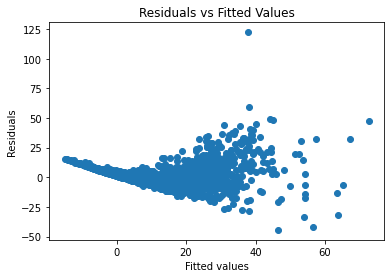

In [22]:
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

- 정규성: QQ 그래프에서 점들이 대각선을 따르면 잔차가 정규 분포를 따른다고 판단

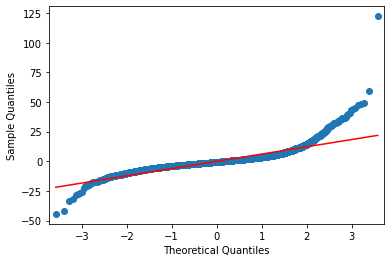

In [23]:
sm.qqplot(residuals, line='s')
plt.show()

- 독립성 : Durbin-Watson 통계량의 값이 2에 가까우면 잔차들이 서로 독립적이라는 가정이 만족된 것

In [24]:
print('Durbin-Watson statistic:', sm.stats.durbin_watson(residuals))

Durbin-Watson statistic: 2.0328497762487423


- 다중공선성
    - one hot encoding 적용 변수들은 완벽한 상관관계가 존재하므로 inf값 가짐
    - Engine, Power열에 다중공선성 존재할 가능성 존재

In [25]:
# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif


,VIF Factor,features
0,0.000000,const
1,1.584187,Year
2,1.064618,Kilometers_Driven
3,2.974860,Mileage
4,9.127494,Engine
5,6.863333,Power
6,1.875870,Seats
7,inf,Transmission_Automatic
8,inf,Transmission_Manual
9,inf,Location_Ahmedabad


<h1>Modeling</h1>

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

- Linear Regression

In [27]:
model = LinearRegression()

model.fit(X_train, y_train)

lr_pred = model.predict(X_test)

mean_squared_error(y_test, lr_pred)

32.60788043177173

- Ridge Regression

In [28]:
model = Ridge(alpha=1.0)

model.fit(X_train, y_train)

ridge_pred = model.predict(X_test)

mean_squared_error(y_test, ridge_pred)

32.47916061365854

- Lasso Regression

In [29]:
model = Lasso(alpha=1.0)

model.fit(X_train, y_train)

lasso_pred = model.predict(X_test)

mean_squared_error(y_test, lasso_pred)

66.96043128171526

- elasticnet Regression

In [30]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

model.fit(X_train, y_train)

elasticnet_pred = model.predict(X_test)

mean_squared_error(y_test, elasticnet_pred)

63.80983654507891

- r2 score

In [31]:
print(r2_score(y_test, lr_pred))
print(r2_score(y_test, ridge_pred))
print(r2_score(y_test, lasso_pred))
print(r2_score(y_test, elasticnet_pred))

0.6994150458430004
0.7006016068863534
0.3827474248361106
0.4117901397240241
